In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

from fBm.utils import BackupHelper, FunctionTimer

In [3]:
import fBm.sim as sim

generators = {
    "Naive": (sim.NaiveFBmGenerator(), 1000),
    "Hosking": (sim.HoskingFBmGenerator(), 10000),
    "Cholesky": (sim.CholeskyFBmGenerator(), 1000),
    "Davies Harte": (sim.DaviesHarteFBmGenerator(), 100000)
}

Naive finished, [0.18555589951574802, 8.537339711561799, 493.8113450924866]
Hosking finished, [0.23538104770705104, 2.253237513359636, 26.434271258302033, 586.0692739197984]
Cholesky finished, [0.044307262636721134, 0.2329375226981938, 76.42477371403947]
Davies Harte finished, [0.10917097935453057, 0.21346914721652865, 1.1344210095703602, 16.717881882097572, 129.96041224803776]


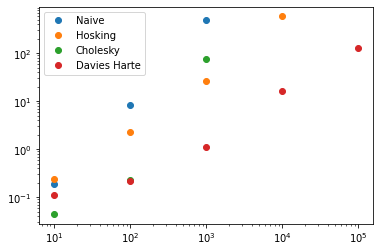

Naive finished, [0.18871189979836345, 8.608568505384028, 436.3900466398336]
Hosking finished, [0.2451121974736452, 2.3160380301997066, 26.70052028214559, 568.7762375292368]
Cholesky finished, [0.048331388272345066, 0.23493072018027306, 76.68073175521567]
Davies Harte finished, [0.10606599785387516, 0.21653351746499538, 1.1232541352510452, 16.734068545978516, 129.14575366768986]


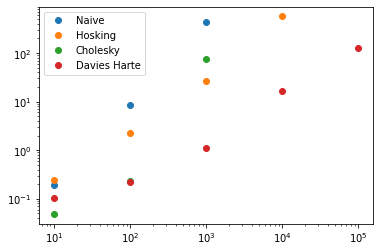

Naive finished, [0.16082704439759254, 1.9056683834642172, 311.16242353757843]
Hosking finished, [0.2573294206522405, 2.247360489796847, 26.427551415748894, 584.4563230252825]
Cholesky finished, [0.04472739528864622, 0.2615621411241591, 82.18450985755771]
Davies Harte finished, [0.11236936273053288, 0.2278516017831862, 1.1719096545130014, 17.79187016095966, 138.41441191360354]


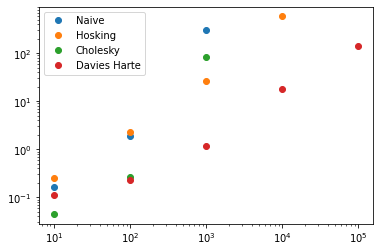

Naive finished, [0.22593537252396345, 10.970612705685198, 480.0549949533306]
Hosking finished, [0.2661688937805593, 2.351422640029341, 27.511371248867363, 579.2702223225497]
Cholesky finished, [0.042516378685832024, 0.2302837958559394, 76.56759234750643]
Davies Harte finished, [0.1109734340570867, 0.22013878542929888, 1.1106310714967549, 16.592392043210566, 130.61920771328732]


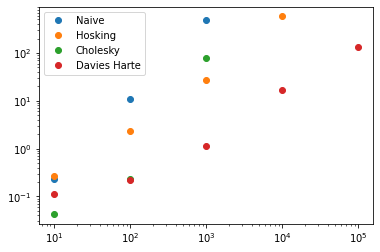

Naive finished, [0.18093083193525672, 7.810301560442895, 391.05837931483984]
Hosking finished, [0.25049320282414556, 2.282435439992696, 26.286206680815667, 569.20461223647]
Cholesky finished, [0.040982373524457216, 0.22633159765973687, 76.82168620591983]
Davies Harte finished, [0.10522811254486442, 0.22089861892163754, 1.1710732216015458, 16.802483800798655, 128.20111868111417]


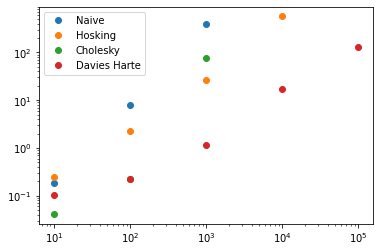

In [8]:
Hs = [0.1, 0.25, 0.5, 0.75, 0.9]
sim_num = 1000
sizes = [10, 100, 1000, 10000, 100000]

result = {}

for H in Hs:
    g:sim.FBmGeneratorInterface
    r = dict()
    for g_name, g_lim in generators.items():
        g, lim = g_lim
        elapsed_time = []
        
        timer_backup = BackupHelper(
            f"./findings/generators",file_name="compare"
        )
        for size in sizes:
            if size > lim:
                continue
            
            backup_version = 0

            paths_backup = BackupHelper(
                f"./findings/generators/{g_name}/paths/{H}",suffix=size
            )

            paths = []
            timer = FunctionTimer()

            for i in range(sim_num):
                paths.append(g.generate_fBm(H, size))

                if (i+1)%100 == 0:
                    timer.pause()
                    paths_backup.dump(paths)
                    timer.cont()

            elapsed_time.append(timer.stop())
        r[g_name] = elapsed_time
        timer_backup.dump(r)

        print(f"{g_name} finished, {elapsed_time}")
        plt.plot(sizes[:len(elapsed_time)], elapsed_time, '-o', label=g_name)
    result[H] = r

    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
        

In [9]:
print(result)

{0.1: {'Naive': [0.18555589951574802, 8.537339711561799, 493.8113450924866], 'Hosking': [0.23538104770705104, 2.253237513359636, 26.434271258302033, 586.0692739197984], 'Cholesky': [0.044307262636721134, 0.2329375226981938, 76.42477371403947], 'Davies Harte': [0.10917097935453057, 0.21346914721652865, 1.1344210095703602, 16.717881882097572, 129.96041224803776]}, 0.25: {'Naive': [0.18871189979836345, 8.608568505384028, 436.3900466398336], 'Hosking': [0.2451121974736452, 2.3160380301997066, 26.70052028214559, 568.7762375292368], 'Cholesky': [0.048331388272345066, 0.23493072018027306, 76.68073175521567], 'Davies Harte': [0.10606599785387516, 0.21653351746499538, 1.1232541352510452, 16.734068545978516, 129.14575366768986]}, 0.5: {'Naive': [0.16082704439759254, 1.9056683834642172, 311.16242353757843], 'Hosking': [0.2573294206522405, 2.247360489796847, 26.427551415748894, 584.4563230252825], 'Cholesky': [0.04472739528864622, 0.2615621411241591, 82.18450985755771], 'Davies Harte': [0.11236936

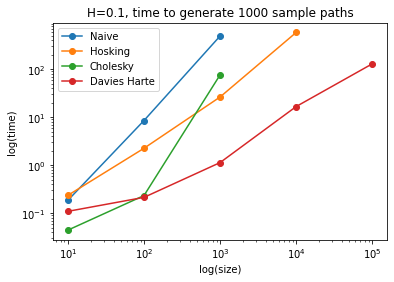

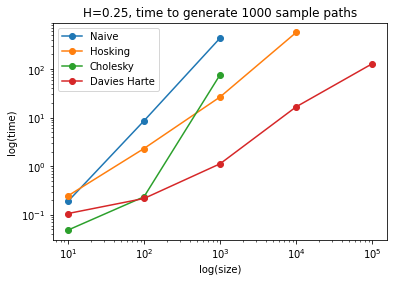

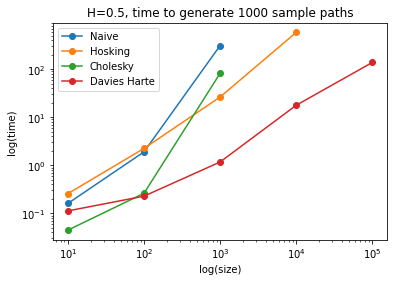

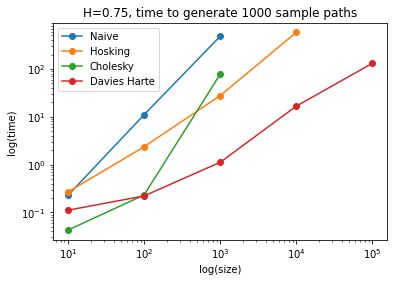

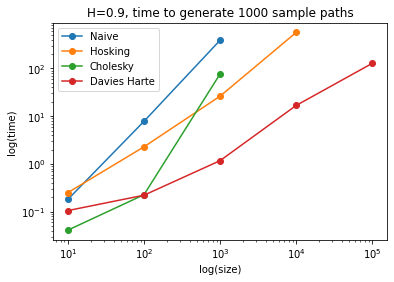

In [23]:
for H, times in result.items():
    for gen_name, gen_time in times.items():
        plt.plot(sizes[:len(gen_time)], gen_time, '-o', label=gen_name)
    plt.xlabel("log(size)")
    plt.ylabel("log(time)")
    plt.title(f"H={H}, time to generate 1000 sample paths")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()